In [1]:
import pandas as pd
import numpy as np
import numpy as np ;import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [3]:
data = pd.read_csv("../DATA/placement1.csv")

In [60]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


## CONTENTS : 
- Mathematical model
- Simple LR from scratch 
- sklearn model (for evaluation)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(data['cgpa'],data['package'])

In [6]:
X_train =  np.array(X_train).reshape(-1,1)
y_train  =  np.array(y_train).reshape(-1,1)

#### => Mathematical Model
***NOTE :  THIS IS DIRECT METHOD*** <br />
**We have used the loss function but mathematically it is MSE (mean squared error)**  <br />

$$ \hat{y} =  m*x_i + b $$
$$ \text{E(m,b)}  = \sum_{i=0}^{i=n} d_i^2 $$
$$d_i = (y_i -  \hat{y})$$
final loss function =>  $(y_i -  mx_i -b)^2$

***To find m =>***  $\frac{\partial E}{\partial m} = 0$ <br />

we get :  $ \boxed{b =  \bar{y} -  m\bar{x}}$


***To find b =>***  $\frac{\partial E}{\partial b} = 0$ <br />

 we get : $\boxed{m =  \frac{\sum_{i=1}^n(y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^n(x_i - \bar{x}^2)}}$






### Simple LR from scratch 


In [7]:
import numpy as np

class SimpleLinearRegression:

    def fit(self, x, y):
        x_mean = np.mean(x)
        y_mean = np.mean(y)

        num = 0
        den = 0

        for i in range(x.shape[0]):
            num += (x[i] - x_mean) * (y[i] - y_mean)
            den += (x[i] - x_mean) ** 2

        self.m = num / den
        self.b = y_mean - (self.m * x_mean)

    def predict(self, x_test):
        return (self.m * x_test) + self.b


In [8]:
model = SimpleLinearRegression()

In [9]:
model.fit(X_train,y_train)

In [11]:
coef = model.m
bias = model.b

In [12]:
coef

array([0.56600186])

In [13]:
bias

array([-0.94481204])

In [14]:
X_predict = model.predict(X_test)

In [15]:
X_predict

10     2.066318
5      3.520943
159    3.985064
111    2.122918
114    2.360639
58     2.971921
138    3.532263
64     3.220962
152    3.226622
133    2.479499
141    2.881361
73     3.832244
169    4.324665
124    2.485159
53     2.717220
52     3.792624
122    1.953118
130    2.836080
21     2.932301
8      2.502139
113    2.983241
121    2.734200
68     3.334162
154    3.062481
197    3.136061
161    3.187002
13     2.977581
199    2.575720
96     3.079461
107    2.637980
183    3.175682
120    2.015378
9      3.758663
62     2.643640
65     3.356802
44     1.936137
40     4.364285
101    2.853060
43     3.390762
49     4.075624
172    2.977581
117    3.085121
2      3.481323
109    3.453022
116    4.171845
92     3.526603
42     2.422899
30     3.220962
76     2.983241
75     3.000221
Name: cgpa, dtype: float64

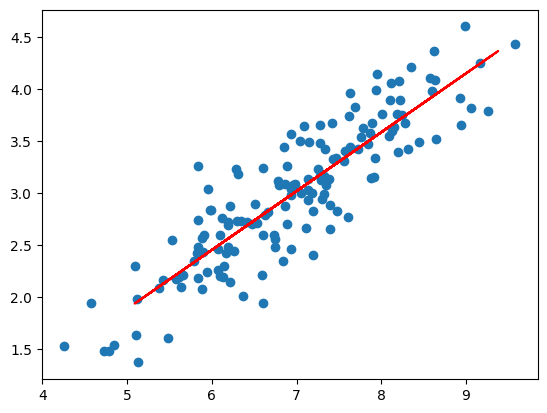

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_test,X_predict,color='r')

## Using Sklearn

In [17]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test  =  np.array(X_test).reshape(-1,1)

In [18]:
ori_m  = LinearRegression()
ori_m.fit(X_train,y_train)

coef = ori_m.coef_
bias = ori_m.intercept_
print(f"Coef : {coef[0]} | Bias : {bias[0]}")

Coef : [0.56600186] | Bias : -0.944812042638457


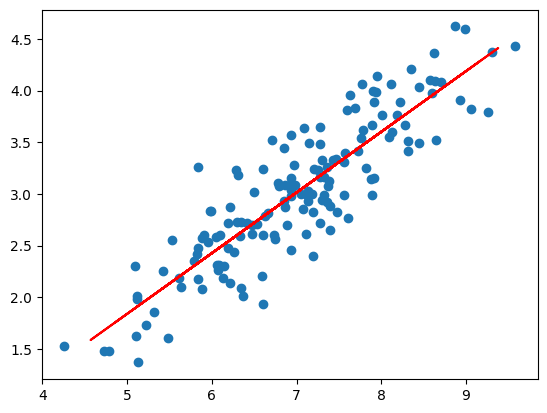

In [76]:
x_predicted_ori =  ori_m.predict(X_test)
plt.scatter(X_train,y_train)
plt.plot(X_test,x_predicted_ori,color='r')

### Clean Simple Regression

In [19]:
class SL_LinearRegression:
    def fit(self,x,y):
        x_mean = np.mean(x)
        y_mean = np.mean(y)

        self.m = np.sum((x - x_mean)*(y-y_mean)/np.sum(x-x_mean)**2)
        self.b = y_mean - self.m*x_mean

    def predict(self,X_test):
        return self.m * X_test + self.b

In [20]:
model1 = SL_LinearRegression()

In [21]:
model1.fit(X_train,y_train)

In [22]:
coef1 = model1.m
bias1 = model1.b

In [23]:
coef1

np.float64(1.1607469370241693e+28)

In [24]:
bias1

np.float64(-8.076554570943306e+28)

In [25]:
X_predict1 = model1.predict(X_test)

In [57]:
X_predict1

array([[ 2.10706181e+26],
       [ 7.67989530e+26],
       [ 4.35211759e+25],
       [-1.95314545e+26],
       [-2.98810025e+26],
       [-1.31625020e+26],
       [-5.93374081e+26],
       [-5.69490509e+26],
       [ 6.96338814e+26],
       [-6.80947179e+26],
       [ 3.55599852e+25],
       [-4.65995029e+26],
       [-4.58033839e+26],
       [ 1.09439835e+27],
       [-1.47547401e+26],
       [-1.65221245e+27],
       [-3.78421932e+26],
       [ 3.71522233e+24],
       [ 2.26628562e+26],
       [ 9.67019298e+26],
       [ 1.23133083e+26],
       [-1.23663829e+26],
       [-4.10266695e+26],
       [-4.42111457e+26],
       [ 8.47601437e+26],
       [-2.43081690e+26],
       [-6.17257653e+26],
       [ 1.23133083e+26],
       [-1.15702638e+26],
       [-5.20131126e+25],
       [-1.79392164e+26],
       [-2.43081690e+26],
       [-3.62499550e+26],
       [-5.85412890e+26],
       [-6.79354940e+25],
       [ 2.18667371e+26],
       [ 2.90318088e+26],
       [ 5.92843335e+26],
       [ 1.3

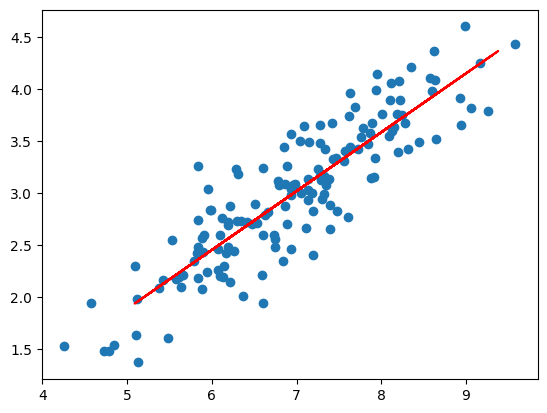

In [26]:
plt.scatter(X_train,y_train)
plt.plot(X_test,X_predict,color='r')